In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
print(df)

    Chirps/Second  Ground Temperature
0            20.0                88.6
1            16.0                71.6
2            19.8                93.3
3            18.4                84.3
4            17.1                80.6
5            15.5                75.2
6            14.7                69.7
7            15.7                71.6
8            15.4                69.4
9            16.3                83.3
10           15.0                79.6
11           17.2                82.6
12           16.0                80.6
13           17.0                83.5
14           14.4                76.3


In [4]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [5]:
# x = df.iloc[:, :-1].values
# y = df.iloc[:, 1].values

In [6]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']

In [7]:
# #Split the data into train and test dataset
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [8]:
print(x,y)

    Ground Temperature
0                 88.6
1                 71.6
2                 93.3
3                 84.3
4                 80.6
5                 75.2
6                 69.7
7                 71.6
8                 69.4
9                 83.3
10                79.6
11                82.6
12                80.6
13                83.5
14                76.3 0     20.0
1     16.0
2     19.8
3     18.4
4     17.1
5     15.5
6     14.7
7     15.7
8     15.4
9     16.3
10    15.0
11    17.2
12    16.0
13    17.0
14    14.4
Name: Chirps/Second, dtype: float64


In [9]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x,y)


LinearRegression()

In [10]:
print('intercept:', linreg.intercept_)
print('coefficient:', linreg.coef_)

intercept: 0.4593146452359562
coefficient: [0.20299973]


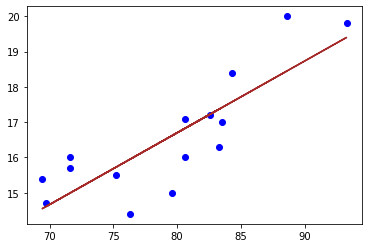

In [11]:
plt.scatter(x, y, color='blue')
plt.plot(x, linreg.predict(x), color='brown')

In [12]:
print('R^square value: ', linreg.score(x, y))

R^square value:  0.6922946529147


In [13]:
#Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
k=np.array([95])
j=k.reshape(1, -1)
print(linreg.predict(j))

[19.74428913]


In [14]:
#Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning

interpolate=(18 - linreg.intercept_) / linreg.coef_
print(interpolate)

[86.40743135]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [29]:
df = pd.read_fwf("brain_body.txt")
print(df)

      Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]


In [30]:
x2 = df['Brain']
x2 = x2.to_frame()
y2 = df['Body']

In [31]:
linreg2=LinearRegression()
linreg2.fit(x2,y2)


LinearRegression()

In [32]:
print('intercept:', linreg2.intercept_)
print('coefficient:', linreg2.coef_)

intercept: 91.00439620740687
coefficient: [0.96649637]


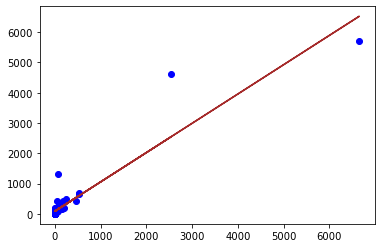

In [36]:
plt.scatter(x2, y2, color='blue')
plt.plot(x2, linreg2.predict(x2), color='brown')

In [35]:
# R-Squared Value
print('r-squared: ', linreg2.score(x2, y2))

r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [21]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
print(df)

    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [22]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x3=df[feature]
y3=df['Salary']

In [23]:
print(x3)

    Sex  Rank  Year  Degree  YSdeg
0     0     3    25       1     35
1     0     3    13       1     22
2     0     3    10       1     23
3     1     3     7       1     27
4     0     3    19       0     30
5     0     3    16       1     21
6     1     3     0       0     32
7     0     3    16       1     18
8     0     3    13       0     30
9     0     3    13       0     31
10    0     3    12       1     22
11    0     2    15       1     19
12    0     3     9       1     17
13    0     2     9       0     27
14    0     3     9       1     24
15    0     3     7       1     15
16    0     3    13       1     20
17    0     2    11       0     14
18    0     2    10       0     15
19    0     3     6       0     21
20    0     1    16       0     23
21    0     2     8       0     31
22    0     3     7       1     13
23    1     3     8       1     24
24    0     2     9       1     12
25    0     3     5       1     18
26    0     2    11       1     14
27    1     3     5 

In [24]:
print(y3)

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64


In [25]:
linreg3=LinearRegression()
linreg3.fit(x3,y3)


LinearRegression()

In [26]:
 # Features & Coefficients
print(list(zip(feature, linreg3.coef_)))

[('Sex', 1241.7924996014194), ('Rank', 5586.181449521441), ('Year', 482.85976782882074), ('Degree', -1331.6440634059074), ('YSdeg', -128.79057354486062)]
